# Abalone Case Study

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


In [1]:
#importing all the libraries we going to use in this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#loading the dataset
df=pd.read_csv('abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#checking dimension
df.shape

(4177, 9)

In [5]:
#checking type of all attributes
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
#statistical summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
#checking the null value in dataset
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])

In [10]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


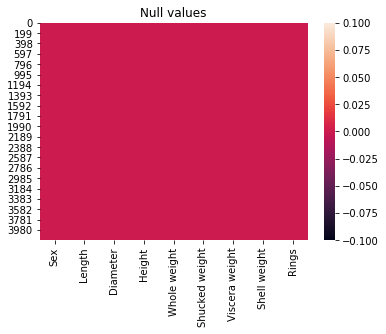

In [11]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [12]:
#Their are no null value in our dataset

<function matplotlib.pyplot.show(*args, **kw)>

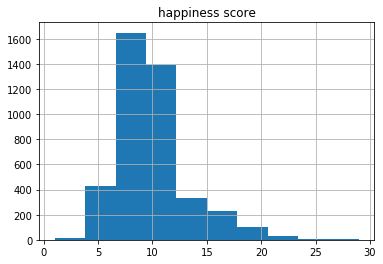

In [13]:
#histogram representation of no of country within a same happiness score 
df["Rings"].hist(grid=True)
plt.title("happiness score")
plt.show

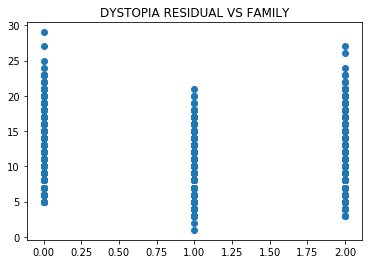

In [14]:
plt.scatter(df["Sex"],df["Rings"])
plt.title("DYSTOPIA RESIDUAL VS FAMILY")
plt.show()

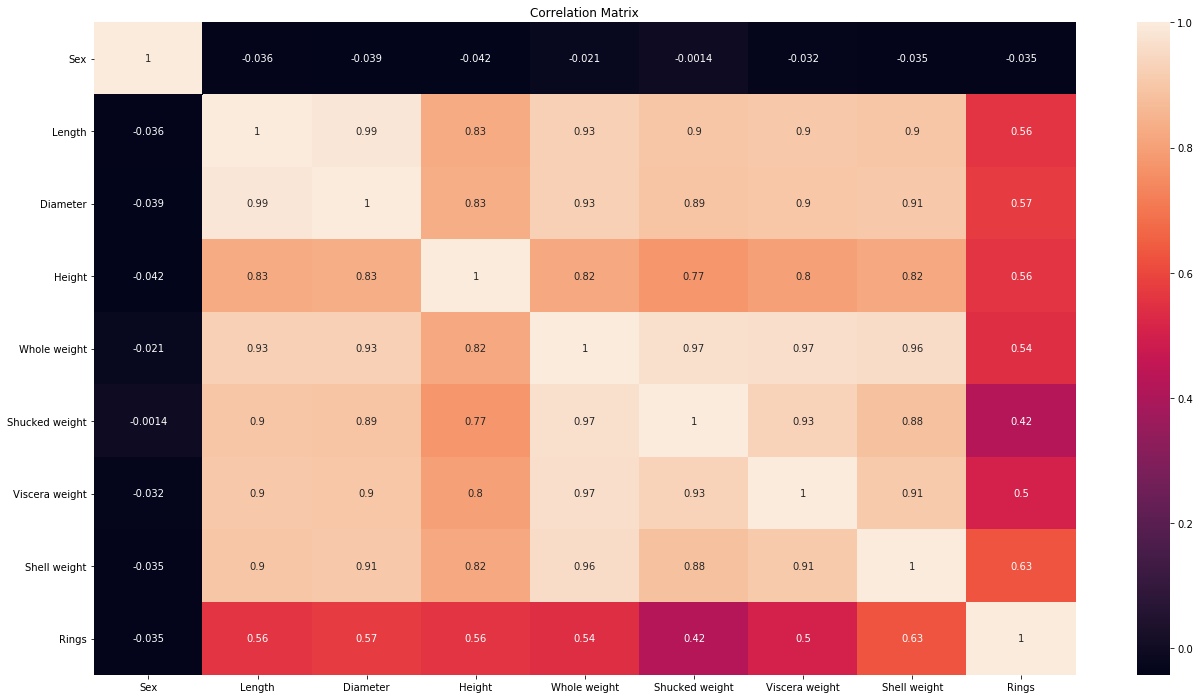

In [15]:
#CHECKING CORELATION
corr_mat=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [16]:
#CREATING TRAIN TEST SPLIT

In [17]:
x=df.drop(["Rings"],axis=1)
y=df[["Rings"]]

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred=lr.predict(x_test)

In [24]:
y_test.head()

,Rings
2846,10
1404,10
2842,9
3720,7
763,14


In [25]:
y_pred[0:5]

array([[ 9.66949018],
       [12.56081395],
       [10.2484646 ],
       [ 7.38747859],
       [13.95423313]])

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_test,y_pred)

5.313175562382438